# This project crawls data from Reddit r/tennis and do sentiment analysis with the posts titles and comments to determine Redditors opinion on Federer, Nadal and Djokovic.

In [ ]:
!pip install praw
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import praw
import re
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax


plt.style.use('ggplot')

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
client_id = "DxlioYjXPmWqaCJatv-oeA"
client_secret = "IpEyf3kRQZ2Xorias4zyu7EKfyD_MQ"
user_agent = "TxMM"
username = "GusgusgusIsGreat"
password = "L4md3pz4i"

In [ ]:
# Initialize Reddit
reddit = praw.Reddit(
    client_id= client_id,
    client_secret= client_secret,
    user_agent= user_agent
)

Getting positive and negative words

In [ ]:
sentiment_words = []

In [ ]:
with open('sentiment_words.txt', encoding='utf-8') as file:
    for line in file:
        sentiment_words.append(line.rstrip())
    file.close()

#Crawling the Headlines

In [ ]:
# Getting relevant headlines
def crawl_reddit(sub_name, search_query, sort_by, limit):
    headlines = []
    comments = []
    for submission in reddit.subreddit(sub_name).search(search_query, sort=sort_by, limit=limit):
        sub = {}
        h = {}
        c = {}
        h['title'] = submission.title
        h['body'] = submission.selftext
        h['id'] = submission.id
        h['score'] = submission.score
        submission.comments.replace_more(limit=0)
        for comment in submission.comments:
            if comment.body == '[deleted]':
                continue
            c['id'] = comment.id
            c['author'] = comment.author
            c['body'] = comment.body
            comments.append(c)
            c = {}
        sub['headline'] = h
        sub['comment'] = comments
        comments = []
        headlines.append(sub)
    return headlines

headlines_djokovic = crawl_reddit('tennis', 'Djokovic vaccination', 'relevance', 10)
# headlines += crawl_reddit('tennis', 'Djokovic accomplishment')

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

In [ ]:
contain_strings = ['Djokovic', 'Novak', 'Nole', '\bhe\b', '\bhim\b']

In [ ]:
df = pd.json_normalize(headlines_djokovic, record_path='comment', meta=[['headline', 'title'],['headline', 'id'], ['headline','score'], ['headline', 'body']], record_prefix='comment.')
mask_sentiment = df['comment.body'].str.contains('|'.join(sentiment_words))
mask_novak = df['comment.body'].str.contains('|'.join(contain_strings))
df_filter_djokovic = df[mask_sentiment & mask_novak]
df_filter_djokovic

,comment.id,comment.author,comment.body,headline.title,headline.id,headline.score,headline.body
0,hx11k2j,medmech,I completely agree about all this nonsense not...,Novak Djokovic vaccination decision terrible f...,st19lf,441,"“I hope that the right trusted person, who is ..."
1,hx1h1o7,chits00,Am a huge fan of Nole but I feel terribly let ...,Novak Djokovic vaccination decision terrible f...,st19lf,441,"“I hope that the right trusted person, who is ..."
2,hx1qg55,iSkinMonkeys,It's a bit futile arguing about the efficacy o...,Novak Djokovic vaccination decision terrible f...,st19lf,441,"“I hope that the right trusted person, who is ..."
5,hx1fflo,LadyJane216,Yes. She's 100% correct. Novak probably has mo...,Novak Djokovic vaccination decision terrible f...,st19lf,441,"“I hope that the right trusted person, who is ..."
10,hx3ayl9,None,"> “Because it’s terrible for tennis, not good ...",Novak Djokovic vaccination decision terrible f...,st19lf,441,"“I hope that the right trusted person, who is ..."
13,hx2ejg6,tb122tb,Why is a jab more important for a player than ...,Novak Djokovic vaccination decision terrible f...,st19lf,441,"“I hope that the right trusted person, who is ..."
22,hx4eo7b,ismartbin,"Have you heard the joke ? \n\nDjokovic, Rodger...",Novak Djokovic vaccination decision terrible f...,st19lf,441,"“I hope that the right trusted person, who is ..."
39,hx66jta,sobyx1,"Someone needs to sit her down, and explain the...",Novak Djokovic vaccination decision terrible f...,st19lf,441,"“I hope that the right trusted person, who is ..."
45,hwkyyim,DurantArtist,Novaks coach is in favour of getting Novak vac...,I am in favor of getting Novak Djokovic vaccin...,sqeb69,3,"""I have always been in favor of getting Novak ..."
46,hwkz6t5,Luck1492,I 100% agree. I “renounced” my Djokovic fan-sh...,I am in favor of getting Novak Djokovic vaccin...,sqeb69,3,"""I have always been in favor of getting Novak ..."


## Basic NLTK

In [ ]:
example = df_filter_djokovic['comment.body'][10]
print(example)

> “Because it’s terrible for tennis, not good for him – and, really, he does lead by example. The fact that he doesn’t trust it, it does lead a lot of people, in his home country and throughout the world.” 

This is why Novak, and others, who say it's a personal decision are crazy. It affects tons of other people. I mean, this whole epidemic started with ONE PERSON and spread from there. Novak is a very famous person. He is undoubtedly responsible for people getting sick and probably dying at this point because of stuff he's said. Likewise, if Novak said "I love pastrami sandwiches" 30 times, you can bet a lot of people went out to get a pastrami sandwich because of what he said. This is why celebrities are paid MILLIONS to endorse products, because people listen to them. 

So great, if Novak gets sick, he's worth 200 million or whatever, he can afford and get quick access to the state of the art covid treatment. But the people listening to his idiotic statements can't. They could die.

In [ ]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['>', '“', 'Because', 'it', '’', 's', 'terrible', 'for', 'tennis', ',']

In [ ]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('>', 'RB'),
 ('“', 'NN'),
 ('Because', 'IN'),
 ('it', 'PRP'),
 ('’', 'VBZ'),
 ('s', 'RBR'),
 ('terrible', 'JJ'),
 ('for', 'IN'),
 ('tennis', 'NN'),
 (',', ',')]

## VADER sentiment scoring

In [ ]:
sia = SentimentIntensityAnalyzer()

sia.polarity_scores(example)

{'neg': 0.093, 'neu': 0.814, 'pos': 0.093, 'compound': -0.2571}

### Calculate sentiments

#### Sentiment for Djokovic

In [ ]:
def get_avg_sentiment(df):
    # Sentiment for title
    player_sentiment = {}
    player_sentiment['neg'] = 0
    player_sentiment['neu'] = 0
    player_sentiment['pos'] = 0
    player_sentiment['compound'] = 0

    post_title = df['headline.title'].drop_duplicates()
    for post in list(post_title):
        player_sentiment['neg'] += sia.polarity_scores(post)['neg']
        player_sentiment['neu'] += sia.polarity_scores(post)['neu']
        player_sentiment['pos'] += sia.polarity_scores(post)['pos']
        player_sentiment['compound'] += sia.polarity_scores(post)['compound']


    post_body = df['headline.body'].drop_duplicates()
    for post in list(post_body):
        player_sentiment['neg'] += sia.polarity_scores(post)['neg']
        player_sentiment['neu'] += sia.polarity_scores(post)['neu']
        player_sentiment['pos'] += sia.polarity_scores(post)['pos']
        player_sentiment['compound'] += sia.polarity_scores(post)['compound']

    # Sentiment for comments

    for i, row in tqdm(df.iterrows(), total=len(df)):
        text = row['comment.body']
        myid = row['comment.id']
        player_sentiment['neg'] += sia.polarity_scores(text)['neg']
        player_sentiment['neu'] += sia.polarity_scores(text)['neu']
        player_sentiment['pos'] += sia.polarity_scores(text)['pos']
        player_sentiment['compound'] += sia.polarity_scores(text)['compound']

    player_sentiment['neg'] = player_sentiment['neg']/(len(df) + len(post_title))
    player_sentiment['neu'] = player_sentiment['neu']/(len(df) + len(post_title))
    player_sentiment['pos'] = player_sentiment['pos']/(len(df) + len(post_title))
    player_sentiment['compound'] = player_sentiment['compound']/(len(df) + len(post_title))

    return player_sentiment

In [ ]:
djokovic_sentiment = get_avg_sentiment(df_filter_djokovic)
djokovic_sentiment

  0%|          | 0/54 [00:00<?, ?it/s]

{'neg': 0.0995873015873016,
 'neu': 0.8695714285714284,
 'pos': 0.12603174603174602,
 'compound': 0.10132222222222223}

#### Sentiment for Federer

Federer is known for his flawless display both on and off courts, therefore, his most controversial moments usually come from incidents with the tennis umpire

In [ ]:
headlines_federer = crawl_reddit('tennis', 'Federer umpire', 'relevance', 10)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

In [ ]:
contain_strings = ['\bhe\b', '\bhim\b', 'Roger', 'Federer', 'Fed']

In [ ]:
df = pd.json_normalize(headlines_federer, record_path='comment', meta=[['headline', 'title'],['headline', 'id'], ['headline','score'], ['headline', 'body']], record_prefix='comment.')
mask = df['comment.body'].str.contains('|'.join(sentiment_words))
mask_federer = df['comment.body'].str.contains('|'.join(contain_strings))
df_filter_federer = df[mask & mask_federer]
df_filter_federer

,comment.id,comment.author,comment.body,headline.title,headline.id,headline.score,headline.body
0,ii0jv78,KSAN05,Looking back and seeing videos of old incident...,"Grumpy Federer Angry With the Umpire: ""Just Sa...",wa853j,3,
2,ihzz1ce,ETeezey1286,When Fed throws a rare hissyfit I can’t do any...,"Grumpy Federer Angry With the Umpire: ""Just Sa...",wa853j,3,
5,icxw55l,Atom3189,Says a lot about Fed if that’s what’s consider...,Roger Federer Loses His Cool in Heated Umpire ...,vfurw9,13,
6,icz169y,4027777,Federer (obviously) in the wrong. The least I ...,Roger Federer Loses His Cool in Heated Umpire ...,vfurw9,13,
7,id201ks,deutschesKirby,"Well by rule book Federer was obviously wrong,...",Roger Federer Loses His Cool in Heated Umpire ...,vfurw9,13,
9,ihomykz,ObscureCilantro,"Federer had won 22,678 games in his profession...",How often did the Umpire say „game federer“ si...,w8c5bk,0,
10,fft23ww,None,Federer: 😠\n\nUmpire : 🙃,"Federer to umpire Veljović: ""Give me a break""",ev1euj,303,
12,ffsv6b5,firk7821,This was an odd “outburst” from Federer. I thi...,"Federer to umpire Veljović: ""Give me a break""",ev1euj,303,
14,ffsxkch,OhEmGeeBasedGod,"I'm a Roger stan to the end, but even Chris Fo...","Federer to umpire Veljović: ""Give me a break""",ev1euj,303,
17,ffta7xv,vunacar,She's Serbian. We sent her to sabotage Federer...,"Federer to umpire Veljović: ""Give me a break""",ev1euj,303,


In [ ]:
federer_sentiment = get_avg_sentiment(df_filter_federer)
federer_sentiment

  0%|          | 0/25 [00:00<?, ?it/s]

{'neg': 0.14300000000000002,
 'neu': 0.7649696969696971,
 'pos': 0.09206060606060606,
 'compound': -0.015778787878787892}

We can see that the compound sentiment of tennis fans on Reddit are more positive towards Djokovic than Federer, although this also depends on the scandal that each person is facing, in which Federer situation is more forgivable and less personal than Djokovic, the gap in sentiment still reflects that tennis fans are not biased toward favoring Federer. They stand for each player's right from the media and respect their opinion. Let's calculate the compound sentiment of Nadal.

#### Sentiment for Nadal


Like Federer, Nadal has captured the heart of many tennis fan. He is best known for his masculinity, strength and never give up attitude in both his physical and spiritual presence. Also like Roger, he hardly ever stirs a big controversy in tennis community. However, his 14th Roland Garros title is rumored by the  pain-killing injections received by him to play the tournament.

In [ ]:
headlines_nadal = crawl_reddit('tennis', 'Nadal foot injections', 'relevance', 10)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

In [ ]:
contain_strings = ['\bhe\b', '\bhim\b', 'Nadal', 'Rafael', 'Rafa']

In [ ]:
df = pd.json_normalize(headlines_nadal, record_path='comment', meta=[['headline', 'title'],['headline', 'id'], ['headline','score'], ['headline', 'body']], record_prefix='comment.')
mask = df['comment.body'].str.contains('|'.join(sentiment_words))
mask_nadal = df['comment.body'].str.contains('|'.join(contain_strings))
df_filter_nadal = df[mask & mask_nadal]
df_filter_nadal

,comment.id,comment.author,comment.body,headline.title,headline.id,headline.score,headline.body
0,ibf4lqn,EvaOgg,Thanks for this. I was alarmed when I heard ab...,Foot Doctor Zach Explains Rafa Nadal's Foot In...,v6erxr,63,
1,ibf1mnd,rychan,I've seen a lot of speculation about Rafa's fo...,Foot Doctor Zach Explains Rafa Nadal's Foot In...,v6erxr,63,
2,ibgmaay,sendcheese247,What baffles me is people say Rafa fakes all o...,Foot Doctor Zach Explains Rafa Nadal's Foot In...,v6erxr,63,
9,ibi8ggu,MisterDisinformation,So the logic behind banning PEDs just doesn't ...,Two French Cyclists have spoken against Nadal’...,v7065k,188,Thought I’d share with r/tennis this piece sin...
10,ibjsnx0,Cheehoo,I think it would help to introduce a basic dis...,Two French Cyclists have spoken against Nadal’...,v7065k,188,Thought I’d share with r/tennis this piece sin...
...,...,...,...,...,...,...,...
214,ib25uby,Pandafy,Is this a surprised pikachu? I'm genuinely sho...,When there is a forfeit due to a foot injury a...,v43cbj,1122,
216,ib2pvvp,BiscuitJc93,I’d missed the injury because a bird flew in m...,When there is a forfeit due to a foot injury a...,v43cbj,1122,
217,ib2a78f,sad_fleaoli_99,well... I missed the last points of the second...,When there is a forfeit due to a foot injury a...,v43cbj,1122,
224,ib25bb8,902384029385,Yeah... poor Zverev! But didn't Nadal say some...,When there is a forfeit due to a foot injury a...,v43cbj,1122,


In [ ]:
nadal_sentiment = get_avg_sentiment(df_filter_nadal)
nadal_sentiment

  0%|          | 0/77 [00:00<?, ?it/s]

{'neg': 0.0948735632183908,
 'neu': 0.7958850574712643,
 'pos': 0.13216091954022988,
 'compound': 0.13559310344827588}

### Plot VADER Results

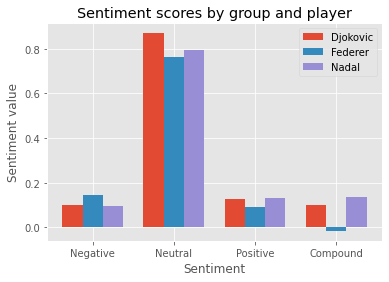

In [ ]:
labels = ['Negative', 'Neutral', 'Positive', 'Compound']
djokovic = [djokovic_sentiment['neg'], djokovic_sentiment['neu'], djokovic_sentiment['pos'], djokovic_sentiment['compound']]
federer = [federer_sentiment['neg'], federer_sentiment['neu'], federer_sentiment['pos'], federer_sentiment['compound']]
nadal = [nadal_sentiment['neg'], nadal_sentiment['neu'], nadal_sentiment['pos'], nadal_sentiment['compound']]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

plt.bar(x - width, djokovic, width, label='Djokovic')
plt.bar(x, federer, width, label='Federer')
plt.bar(x + width, nadal, width, label='Nadal')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Sentiment value')
plt.title('Sentiment scores by group and player')
plt.xlabel("Sentiment")

plt.xticks(x, labels)
plt.legend()


plt.show()

## Roberta Pretrained Model

An internal validation tool trained on a large corpus of data. The VADER analyzer only looks at every single word in the text and score them individually. However, not every word in the text is used with its inteded meaning - a negative word can be used for sarcastic reasons. Using the Roberta PreTrained model, we can pick up the underlying relationships between words thus reveal their actual context.

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Downloading:   0%|          | 0.00/747 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
# VADER results on example
print(example)
sia.polarity_scores(example)

> “Because it’s terrible for tennis, not good for him – and, really, he does lead by example. The fact that he doesn’t trust it, it does lead a lot of people, in his home country and throughout the world.” 

This is why Novak, and others, who say it's a personal decision are crazy. It affects tons of other people. I mean, this whole epidemic started with ONE PERSON and spread from there. Novak is a very famous person. He is undoubtedly responsible for people getting sick and probably dying at this point because of stuff he's said. Likewise, if Novak said "I love pastrami sandwiches" 30 times, you can bet a lot of people went out to get a pastrami sandwich because of what he said. This is why celebrities are paid MILLIONS to endorse products, because people listen to them. 

So great, if Novak gets sick, he's worth 200 million or whatever, he can afford and get quick access to the state of the art covid treatment. But the people listening to his idiotic statements can't. They could die.

{'neg': 0.093, 'neu': 0.814, 'pos': 0.093, 'compound': -0.2571}

In [ ]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(example)
print(scores_dict)

> “Because it’s terrible for tennis, not good for him – and, really, he does lead by example. The fact that he doesn’t trust it, it does lead a lot of people, in his home country and throughout the world.” 

This is why Novak, and others, who say it's a personal decision are crazy. It affects tons of other people. I mean, this whole epidemic started with ONE PERSON and spread from there. Novak is a very famous person. He is undoubtedly responsible for people getting sick and probably dying at this point because of stuff he's said. Likewise, if Novak said "I love pastrami sandwiches" 30 times, you can bet a lot of people went out to get a pastrami sandwich because of what he said. This is why celebrities are paid MILLIONS to endorse products, because people listen to them. 

So great, if Novak gets sick, he's worth 200 million or whatever, he can afford and get quick access to the state of the art covid treatment. But the people listening to his idiotic statements can't. They could die.

Contrary to the VADER sentiment analyzer, the ROBERTA pretrained model deems the comment is a lot more negative, which makes more sense when reading it - this redditor considers not getting vaccinated agains COVID to be a serious issue.

Let's apply this model to the datasets of Djokovic, Federer and Nadal

In [ ]:
def polarity_scores_roberta(text):
    encoded_text = tokenizer(text, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
def get_avg_sentiment_roberta(df):
    player_sentiment = {}
    player_sentiment['roberta_neg'] = 0
    player_sentiment['roberta_neu'] = 0
    player_sentiment['roberta_pos'] = 0

    # Sentiment for headline
    post_title = df['headline.title'].drop_duplicates()
    for post in list(post_title):
        player_sentiment['roberta_neg'] += polarity_scores_roberta(post)['roberta_neg']
        player_sentiment['roberta_neu'] += polarity_scores_roberta(post)['roberta_neu']
        player_sentiment['roberta_pos'] += polarity_scores_roberta(post)['roberta_pos']

    # Sentiment for post body
    post_body = df['headline.body'].drop_duplicates()
    post_id = df['headline.id'].drop_duplicates()
    post = dict(zip(list(post_id),list(post_body)))

    for id, body in post.items():
        try:
            player_sentiment['roberta_neg'] += polarity_scores_roberta(body)['roberta_neg']
            player_sentiment['roberta_neu'] += polarity_scores_roberta(body)['roberta_neu']
            player_sentiment['roberta_pos'] += polarity_scores_roberta(body)['roberta_pos']
        except RuntimeError:
            print(f'Broke for id {id}')

    # Sentiment for comments
    for i, row in tqdm(df.iterrows(), total=len(df)):
        try:
            text = row['comment.body']
            id = row['comment.id']
            player_sentiment['roberta_neg'] += polarity_scores_roberta(text)['roberta_neg']
            player_sentiment['roberta_neu'] += polarity_scores_roberta(text)['roberta_neu']
            player_sentiment['roberta_pos'] += polarity_scores_roberta(text)['roberta_pos']
        except RuntimeError:
            print(f'Broke for id {id}')

    # Averaging
    player_sentiment['roberta_neg'] = player_sentiment['roberta_neg'] / (len(post_title) + len(df))
    player_sentiment['roberta_neu'] = player_sentiment['roberta_neu'] / (len(post_title) + len(df))
    player_sentiment['roberta_pos'] = player_sentiment['roberta_pos'] / (len(post_title) + len(df))
    return player_sentiment

In [ ]:
roberta_sentiment_djokovic = get_avg_sentiment_roberta(df_filter_djokovic)
roberta_sentiment_federer = get_avg_sentiment_roberta(df_filter_federer)
roberta_sentiment_nadal = get_avg_sentiment_roberta(df_filter_nadal)

Broke for id hewbtu
Broke for id vtrg8k
Broke for id s4w4hn


  0%|          | 0/54 [00:00<?, ?it/s]

Broke for id fvuugci


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/77 [00:00<?, ?it/s]

Broke for id icpa5cj
Broke for id i8df76o


In [ ]:
roberta_sentiment_djokovic

{'roberta_neg': 0.4539496946917285,
 'roberta_neu': 0.46313944334785145,
 'roberta_pos': 0.13052990909902348}

In [ ]:
roberta_sentiment_federer

{'roberta_neg': 0.4307968277046739,
 'roberta_neu': 0.4654487623184016,
 'roberta_pos': 0.13405743990601462}

In [ ]:
roberta_sentiment_nadal

{'roberta_neg': 0.37557629306650797,
 'roberta_neu': 0.4634311968011075,
 'roberta_pos': 0.17248677611136917}

### Comparison between VADER and Roberta

Scores between two models

In [ ]:
djokovic_combined = {**djokovic_sentiment, **roberta_sentiment_djokovic}
federer_combined = {**federer_sentiment, **roberta_sentiment_federer}
ndadal_combined = {**nadal_sentiment, **roberta_sentiment_nadal}
djokovic_combined

{'neg': 0.0995873015873016,
 'neu': 0.8695714285714284,
 'pos': 0.12603174603174602,
 'compound': 0.10132222222222223,
 'roberta_neg': 0.4539496946917285,
 'roberta_neu': 0.46313944334785145,
 'roberta_pos': 0.13052990909902348}

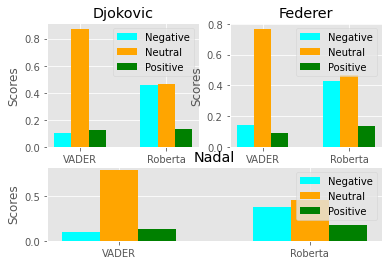

In [ ]:
x = np.arange(2)
negative_djokovic = [djokovic_combined['neg'], djokovic_combined['roberta_neg']]
neutral_djokovic = [djokovic_combined['neu'], djokovic_combined['roberta_neu']]
positive_djokovic = [djokovic_combined['pos'], djokovic_combined['roberta_pos']]

negative_federer = [federer_combined['neg'], federer_combined['roberta_neg']]
neutral_federer = [federer_combined['neu'], federer_combined['roberta_neu']]
positive_federer = [federer_combined['pos'], federer_combined['roberta_pos']]

negative_nadal = [ndadal_combined['neg'], ndadal_combined['roberta_neg']]
neutral_nadal = [ndadal_combined['neu'], ndadal_combined['roberta_neu']]
positive_nadal = [ndadal_combined['pos'], ndadal_combined['roberta_pos']]
width = 0.2

# Create 2x2 sub plots
gs = gridspec.GridSpec(2, 2, height_ratios=[5, 3])
pl.figure()
labels = ('VADER', 'Roberta')

# Plot for Djokovic
ax1 = pl.subplot(gs[0, 0]) # row 0, col 0
ax1.bar(x-0.2, negative_djokovic, width, color='cyan')
ax1.bar(x, neutral_djokovic, width, color='orange')
ax1.bar(x+0.2, positive_djokovic, width, color='green')
ax1.set_title("Djokovic")
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.set_ylabel("Scores")
ax1.legend(['Negative', 'Neutral', 'Positive'])

# Plot for Federer
ax2 = pl.subplot(gs[0, 1]) # row 0, col 1
ax2.bar(x-0.2, negative_federer, width, color='cyan')
ax2.bar(x, neutral_federer, width, color='orange')
ax2.bar(x+0.2, positive_federer, width, color='green')
ax2.set_title("Federer")
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax2.set_ylabel("Scores")
ax2.legend(['Negative', 'Neutral', 'Positive'])

# Plot for Nadal

ax3 = pl.subplot(gs[1, :]) # row 1, span all columns
ax3.bar(x-0.2, negative_nadal, width, color='cyan')
ax3.bar(x, neutral_nadal, width, color='orange')
ax3.bar(x+0.2, positive_nadal, width, color='green')
ax3.set_title("Nadal")
ax3.set_xticks(x)
ax3.set_xticklabels(labels)
ax3.set_ylabel("Scores")
ax3.legend(['Negative', 'Neutral', 'Positive'])

## External Validation:

Outside resources and literature...

## Word Cloud for Each player

In [ ]:
from wordcloud import WordCloud

### Djokovic

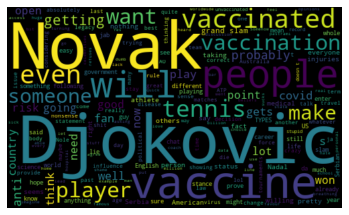

In [ ]:
allWords_djokovic = ' '.join([cmt for cmt in df_filter_djokovic['comment.body']])
wordCloud_djokovic = WordCloud(width = 500, height = 300, max_font_size = 100, random_state = 21).generate(allWords_djokovic)

plt.imshow(wordCloud_djokovic, interpolation='bilinear')
plt.axis('off')
plt.show()

### Federer

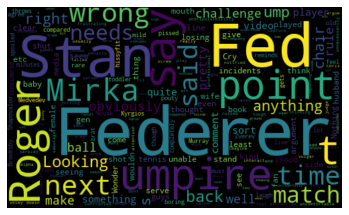

In [ ]:
allWords_federer = ' '.join([cmt for cmt in df_filter_federer['comment.body']])
wordCloud_federer = WordCloud(width = 500, height = 300, max_font_size = 100, random_state = 21).generate(allWords_federer)

plt.imshow(wordCloud_federer, interpolation='bilinear')
plt.axis('off')
plt.show()

### Nadal

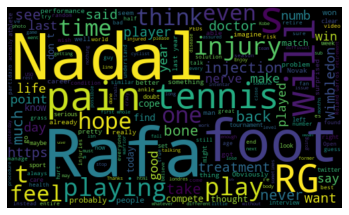

In [ ]:
allWords_nadal = ' '.join([cmt for cmt in df_filter_nadal['comment.body']])
wordCloud_nadal = WordCloud(width = 500, height = 300, max_font_size = 100, random_state = 21).generate(allWords_nadal)

plt.imshow(wordCloud_nadal, interpolation='bilinear')
plt.axis('off')
plt.show()